In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("housing.csv")
#loading the data into the data fram named "data"

In [7]:
data.info()
#since we found that only total_bedrooms is missing some values,
#we will now drop the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data.dropna(inplace = True)#drops all the non null values form the data set 

### Split the data into training and testing data (X & Y ) data
#### In X we are dropping the target value that is **(medain_house_value)** and keeping everything else for training, because we are trying to predict that thing
#### (Y) will only be our target value


In [9]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1) # testing data (dropping target) axis = 1 to drop the whole column
y = data['median_house_value']# (storing only target values)

#### 🧩 What train_test_split Does:

It shuffles and splits X and y into:

    X_train → inputs for training the model.

    X_test → inputs for testing the model.

    y_train → actual prices (targets) for training.

    y_test → actual prices (targets) for testing.

So the model will learn from X_train and y_train, and then be evaluated using X_test and y_test.

test_size = 0.2 means 20% of the data goes into the **test set**, and the other 80% goes into the **training set**.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Next step is Joining the target and features into a single dataset called train_data:
particularly for Visualization purposes in this case.

we use funs like `.hist()` , `.corr()`, `sns.heatmap()` to find distributions and corelations between data.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

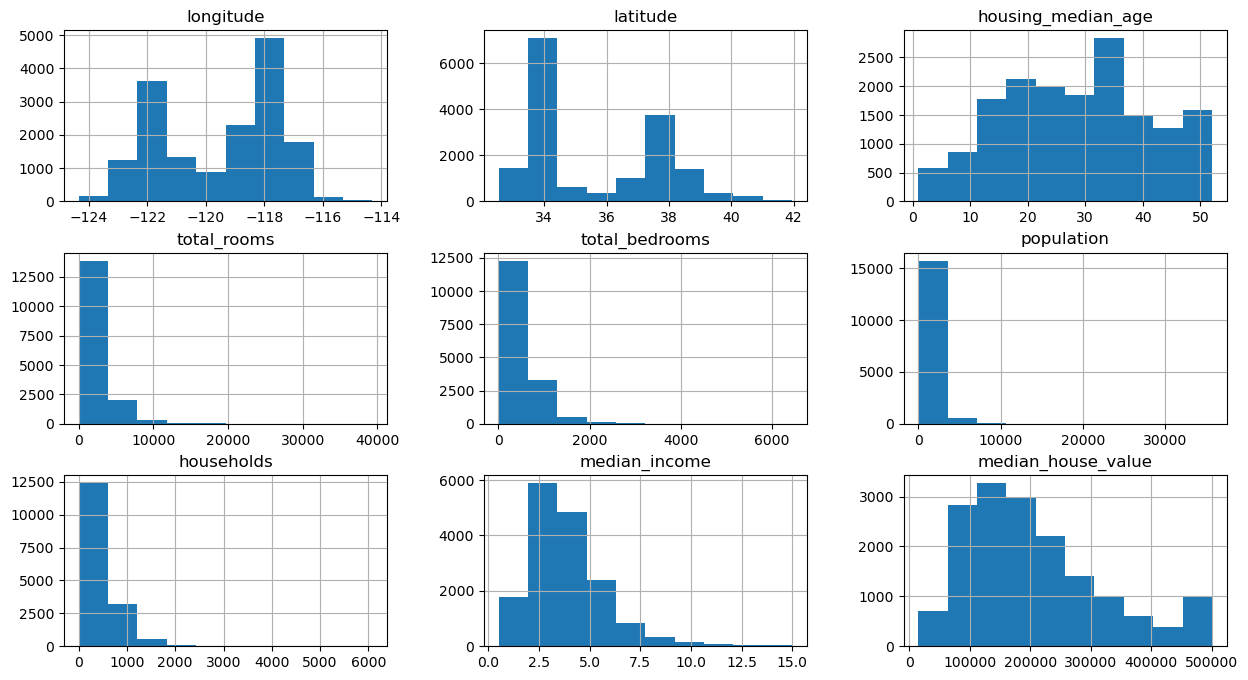

In [28]:
#Joining the target and features into a single dataset called train_data:
#For Visualization or Feature Engineering
train_data = X_train.join(y_train)
train_data.hist(figsize=(15,8)) #visualizing using histogram for normal distribution curve
#In this case we find the data is right skewed (leanining towards left)
#We'll take the log of the features below to achieve Gaussian bell curve later on

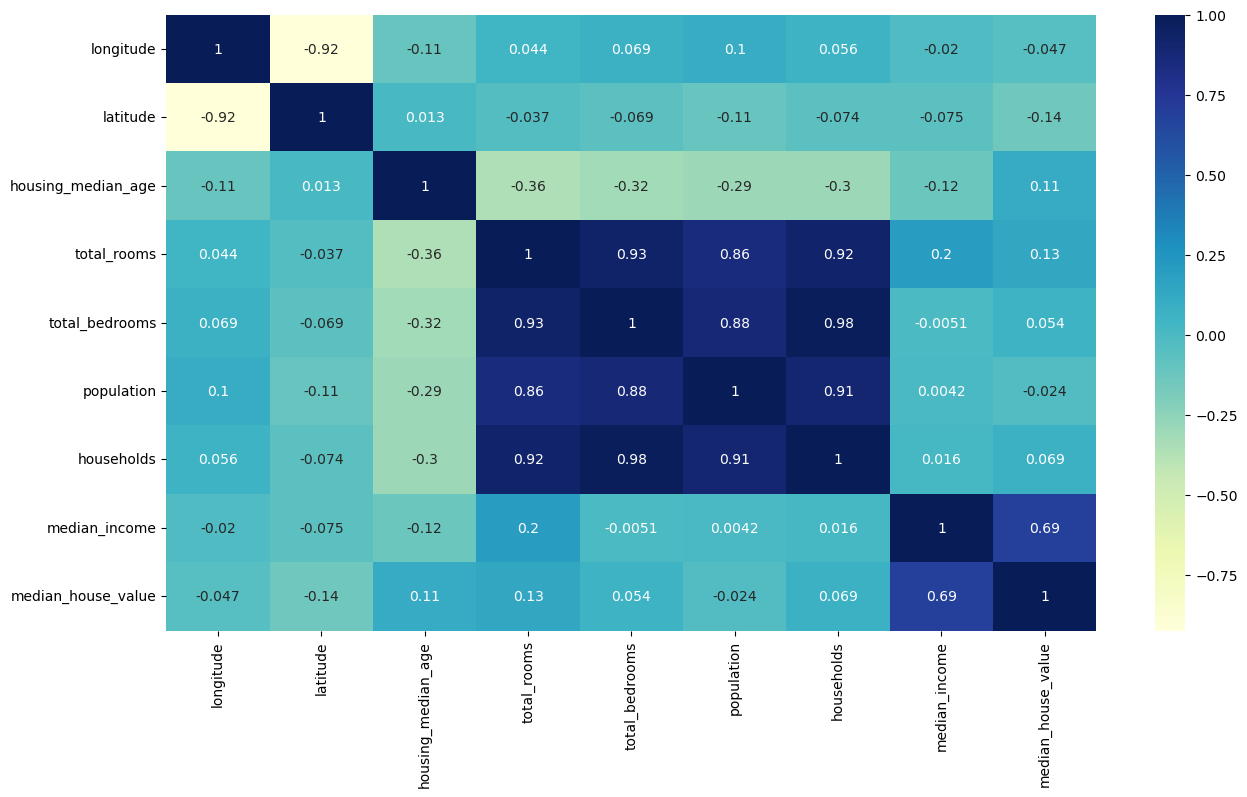

In [29]:
#visualizing Corelation using a heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop(columns=['ocean_proximity']).corr(), annot=True, cmap='YlGnBu')
plt.savefig("figure.png")

#We found out that media_income highly co-relates to (median_house_value) out target value, this is an important catch

#### The part up untill the point above was for **Data Visualization** Now we'll move towards **Data PreProcessing**
#### Computing the natural log of each column
To reduce the right(positive) skeweness of out data and gain gaussian bell curve

& To make relationships more linear

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

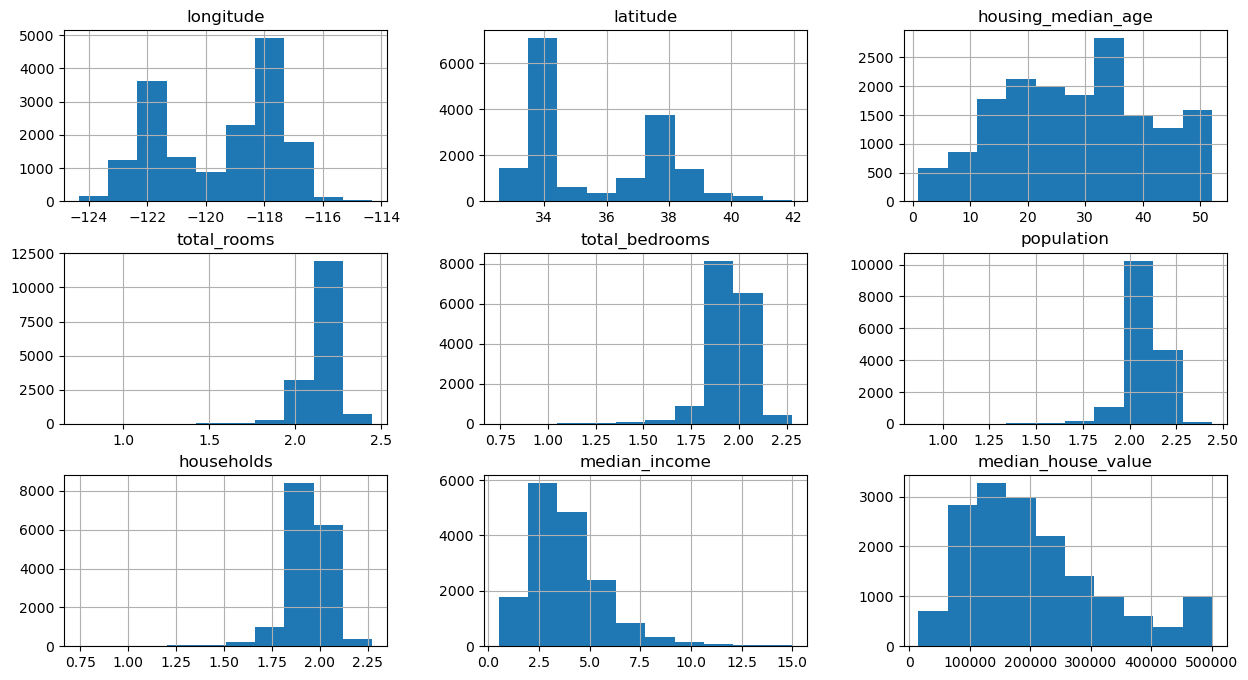

In [31]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

train_data.hist(figsize=(15,8))
# plt.savefig("figure.png")
# train_data['ocean_proximity'].unique() #To find all the unique values in the ocean_proxmity column

In [27]:
train_data['ocean_proximity'].unique() #To find all the unique values in the ocean_proxmity column

array(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)